In [206]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [207]:
df = pd.read_excel("data/Data_Train.xlsx")
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


# Data Cleaning

In [209]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

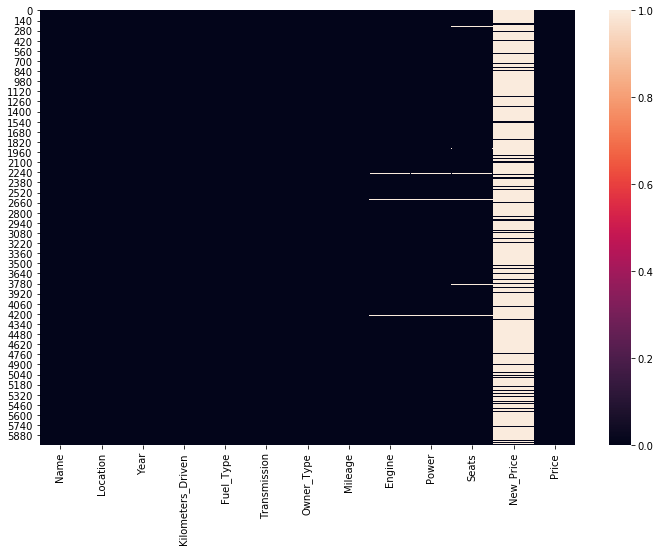

In [210]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [211]:
df.drop(labels=['New_Price'],axis=1,inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [212]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [213]:
df.dropna(inplace=True)

In [214]:
df.reset_index(inplace=True)

In [215]:
df.head()

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [216]:
df['Brand'] = df.Name.apply(lambda x: x.split(" ")[0])
df['Model_Name'] = df.Name.apply(lambda x: " ".join(x.split(" ")[1:]))
df.drop(labels=['Name'], axis=1, inplace=True)

In [217]:
df.columns

Index(['index', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model_Name'],
      dtype='object')

In [218]:
df = df[['Brand', 'Model_Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
         'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]
df.head()

,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [219]:
df.Mileage = df.Mileage.apply(lambda x: str(x.split(" ")[0]))
df.Engine = df.Engine.apply(lambda x: str(x.split(" ")[0]))
df.Power = df.Power.apply(lambda x: str(x.split(" ")[0]))
df.head()

,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5975 non-null   object 
 1   Model_Name         5975 non-null   object 
 2   Location           5975 non-null   object 
 3   Year               5975 non-null   int64  
 4   Kilometers_Driven  5975 non-null   int64  
 5   Fuel_Type          5975 non-null   object 
 6   Transmission       5975 non-null   object 
 7   Owner_Type         5975 non-null   object 
 8   Mileage            5975 non-null   object 
 9   Engine             5975 non-null   object 
 10  Power              5975 non-null   object 
 11  Seats              5975 non-null   float64
 12  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 607.0+ KB


In [221]:
for i in df.columns:
    print('*'*50)
    print(df[i].value_counts())
    print("*"*50)

**************************************************
Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Ambassador          1
Smart               1
Lamborghini         1
Bentley             1
Name: Brand, dtype: int64
**************************************************
**************************************************
XUV500 W8 2WD               49
Swift VDI                   45
City 1.5 S MT               34
Swift Dzire VDI             34
Swift VDI BSIV 

In [222]:
df = df[df.Power != 'null']
df.Mileage = df.Mileage.apply(lambda x: float(x))
df.Engine = df.Engine.apply(lambda x: float(x))
df.Power = df.Power.apply(lambda x: float(x))

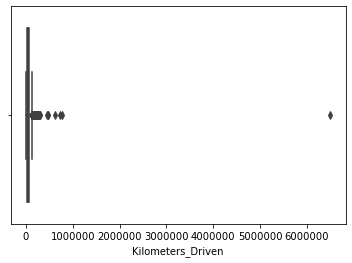

In [223]:
sns.boxplot(df.Kilometers_Driven)

In [224]:
for i in np.arange(50):
    index = df[df.Kilometers_Driven == df.Kilometers_Driven.max()].index
    df.drop(index=index, inplace=True, axis=1)
df.reset_index(inplace=True)

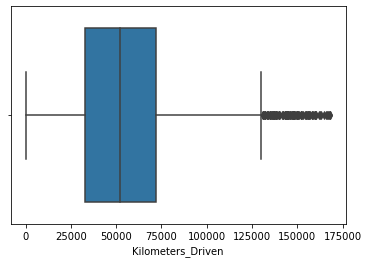

In [225]:
sns.boxplot(df.Kilometers_Driven)

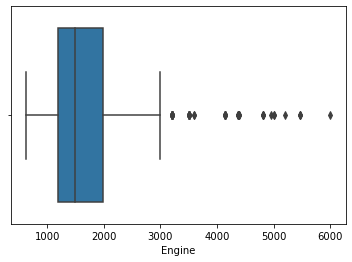

In [226]:
sns.boxplot(df.Engine)

In [227]:
for i in np.arange(10):
    index = df[df.Engine == df.Engine.max()].index
    df.drop(index=index, inplace=True, axis=1)
df.reset_index(inplace=True)

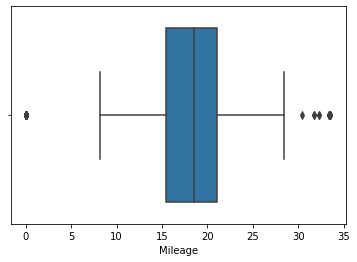

In [228]:
sns.boxplot(df.Mileage)

In [229]:
index = df[df.Mileage == df.Mileage.min()].index
df.drop(index=index, inplace=True, axis=1)

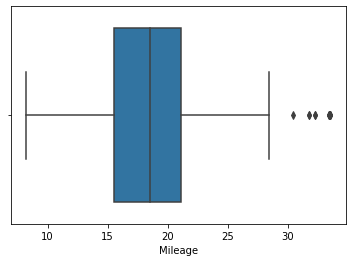

In [230]:
sns.boxplot(df.Mileage)

In [231]:
df

,level_0,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770,5800,5970,Maruti,Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
5771,5801,5971,Hyundai,Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
5772,5802,5972,Mahindra,Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
5773,5803,5973,Maruti,Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


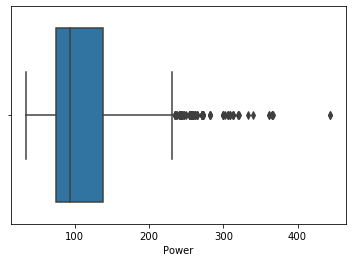

In [232]:
sns.boxplot(df.Power)

In [233]:
for i in np.arange(30):
    index = df[df.Power == df.Power.max()].index
    df.drop(index=index, inplace=True, axis=1)
df.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [234]:
del df['level_0']

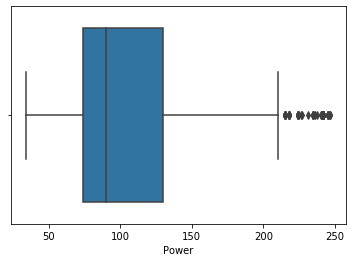

In [235]:
sns.boxplot(df.Power)

# Data Visualization

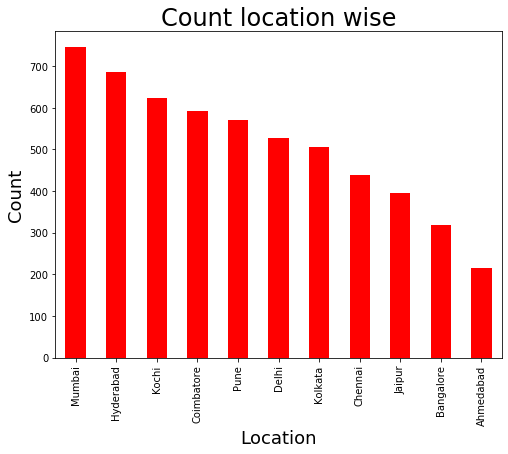

In [236]:
plt.figure(figsize = (8,6))
pd.value_counts(df.Location).plot.bar(color='r')
plt.title('Count location wise', size = 24)
plt.xlabel('Location', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

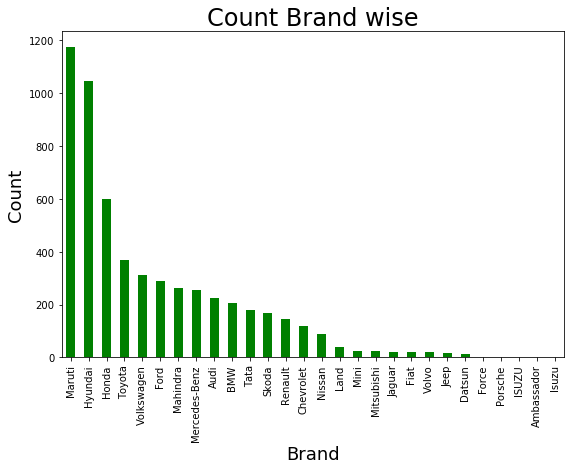

In [237]:
plt.figure(figsize = (9,6))
pd.value_counts(df.Brand).plot.bar(color='g')
plt.title('Count Brand wise', size = 24)
plt.xlabel('Brand', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

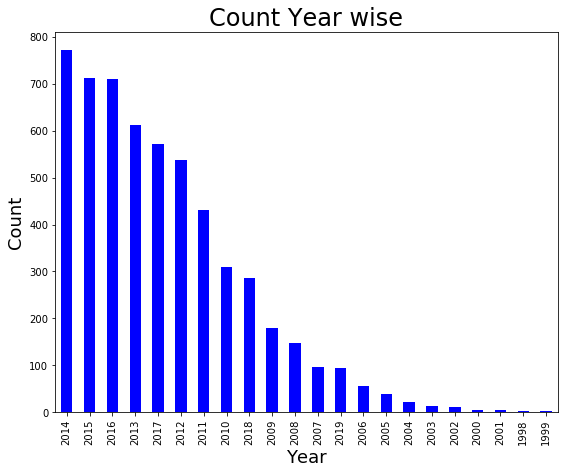

In [238]:
plt.figure(figsize = (9,7))
pd.value_counts(df.Year).plot.bar(color='b')
plt.title('Count Year wise', size = 24)
plt.xlabel('Year', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

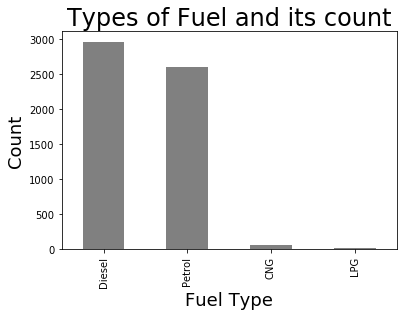

In [239]:
plt.figure(figsize = (6,4))
pd.value_counts(df.Fuel_Type).plot.bar(color='grey')
plt.title('Types of Fuel and its count', size = 24)
plt.xlabel('Fuel Type', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

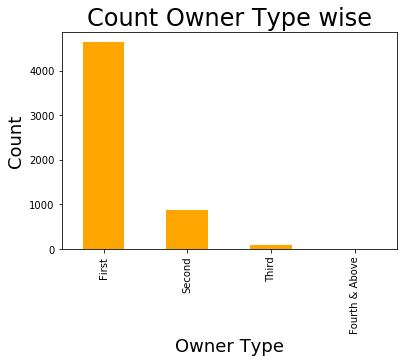

In [240]:
plt.figure(figsize = (6,4))
pd.value_counts(df.Owner_Type).plot.bar(color='orange')
plt.title('Count Owner Type wise', size = 24)
plt.xlabel('Owner Type', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

In [241]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [242]:
df.Brand = LabelEncoder().fit_transform(df.Brand)
df.Model_Name = LabelEncoder().fit_transform(df.Model_Name)
df.Location = LabelEncoder().fit_transform(df.Location)
df.Owner_Type = LabelEncoder().fit_transform(df.Owner_Type)
df.Fuel_Type = LabelEncoder().fit_transform(df.Fuel_Type)
df.Transmission = LabelEncoder().fit_transform(df.Transmission)

In [243]:
df.head()

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,16,1490,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,1,9,419,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,8,837,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50
3,3,16,566,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,4,1,73,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5620 entries, 0 to 5774
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5620 non-null   int64  
 1   Brand              5620 non-null   int32  
 2   Model_Name         5620 non-null   int32  
 3   Location           5620 non-null   int32  
 4   Year               5620 non-null   int64  
 5   Kilometers_Driven  5620 non-null   int64  
 6   Fuel_Type          5620 non-null   int32  
 7   Transmission       5620 non-null   int32  
 8   Owner_Type         5620 non-null   int32  
 9   Mileage            5620 non-null   float64
 10  Engine             5620 non-null   float64
 11  Power              5620 non-null   float64
 12  Seats              5620 non-null   float64
 13  Price              5620 non-null   float64
dtypes: float64(5), int32(6), int64(3)
memory usage: 526.9 KB


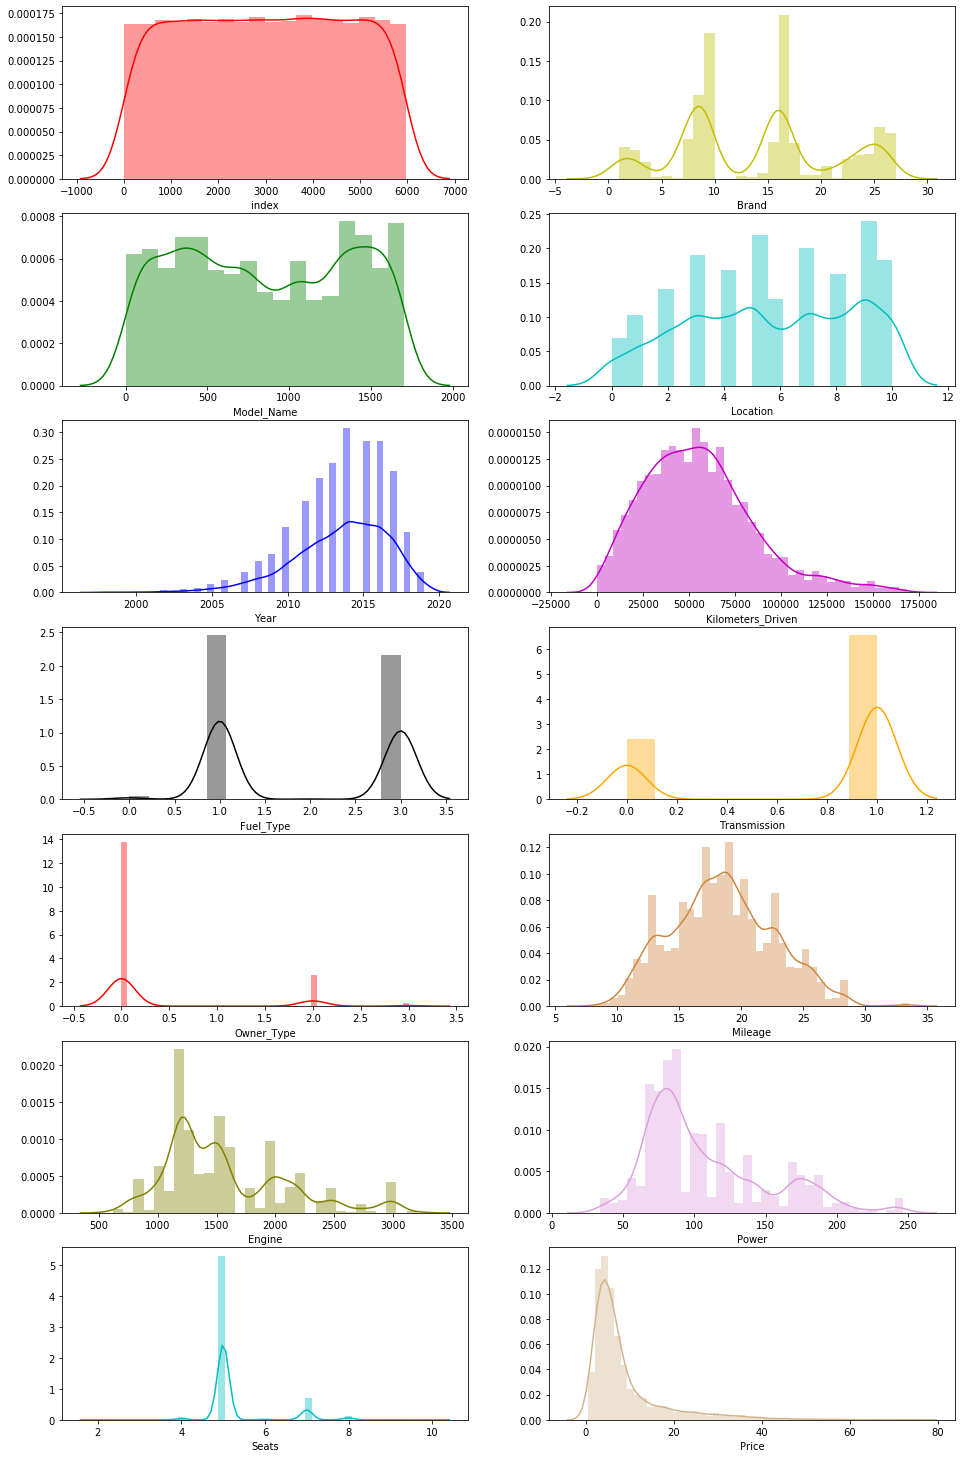

In [245]:
plt.figure(figsize=(16,26))
c = ['r','y','g','c','b','m','k','orange','r', 'peru', 'olive','plum', 'c', 'tan']
for i in np.arange(0,14):
    plt.subplot(7,2,i+1)
    sns.distplot(df[df.columns[i]], color=c[i])

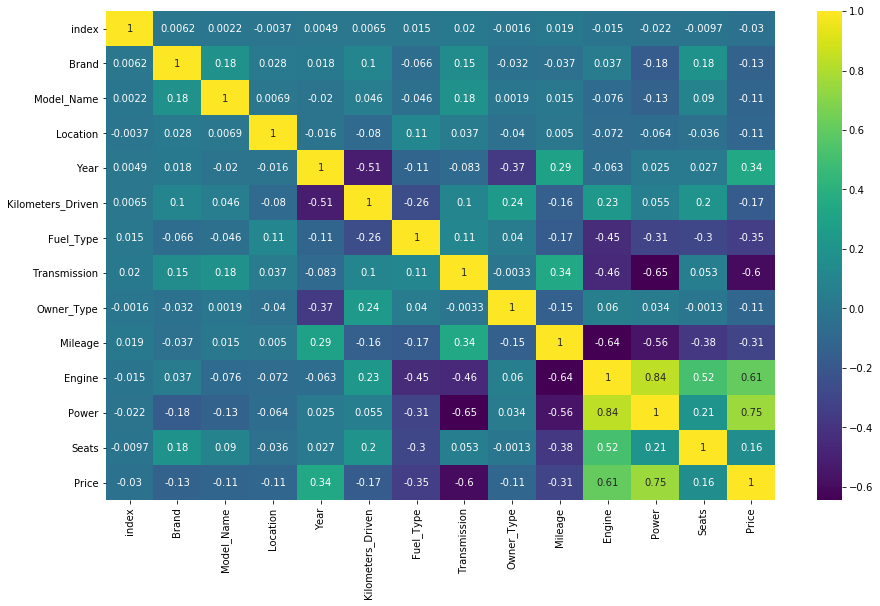

In [248]:
#knowing corelation between features
plt.figure(figsize=(15,9))
ax = sns.heatmap(df.corr(), annot=True, cmap='viridis')
ax

In [249]:
X = df.drop(labels=['Price', 'Model_Name', 'Transmission'], axis=1)
Y=df['Price']

In [252]:
X=X.iloc[:,1:]
X.columns

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [253]:
X

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats
0,16,9,2010,72000,0,0,26.60,998.0,58.16,5.0
1,9,10,2015,41000,1,0,19.67,1582.0,126.20,5.0
2,8,2,2011,46000,3,0,18.20,1199.0,88.70,5.0
3,16,2,2012,87000,1,0,20.77,1248.0,88.76,7.0
4,1,3,2013,40670,1,2,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...
5770,16,4,2014,27365,1,0,28.40,1248.0,74.00,5.0
5771,9,6,2015,100000,1,0,24.40,1120.0,71.00,5.0
5772,15,6,2012,55000,1,2,14.00,2498.0,112.00,8.0
5773,16,8,2013,46000,3,0,18.90,998.0,67.10,5.0


In [254]:
#for accurate training results
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [267]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=5)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4496, 10) (1124, 10) (4496,) (1124,)


In [298]:
#import libraries of models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [308]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Accuracy:',reg.score(x_test,y_test))

Mean Squared Error: 24.980735746250527
Accuracy: 0.668742862582052


In [306]:
reg=KNeighborsRegressor()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Accuracy:',reg.score(x_test,y_test))

Mean Squared Error: 13.363972971530249
Accuracy: 0.8227869876993357


In [305]:
reg=RandomForestRegressor()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Accuracy:',reg.score(x_test,y_test))

Mean Squared Error: 7.145036887869365
Accuracy: 90.52532123047456
